<a href="https://colab.research.google.com/github/rohanSSiddeshwara/HappyMonk/blob/main/Model_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction:

In this notebook, we will discuss the implementation details of a neural network using an Ada-Act activation function for training. The Ada-Act activation function is defined as k0 + k1z + k2z^2, where z is the input and k0, k1, k2 are coefficients that are learned during training. The network architecture consists of three layers: an input layer, two hidden layers, and an output layer. The input and hidden layers use the Ada-Act activation function, while the output layer uses the softmax function. The network is trained using the categorical cross-entropy loss function.

## Algorithm:

Initialize the network parameters: weights and biases for the three layers (w1, b1, w2, b2, w3, b3) and coefficients for the Ada-Act activation function (k). The initial values for the weights and biases can be sampled from a random distribution, such as a normal distribution with mean 0 and standard deviation 1. The initial values for the Ada-Act coefficients can be set to some small constant, such as 0.01.

. `Preprocess the data`: split the dataset into training and test sets, and standardize the features.

. `Perform forward propagation`: compute the activation values for each layer using the input data and the current network parameters.

. `Compute the loss`: use the output activation values and the true labels to compute the categorical cross-entropy loss.

. `Perform backpropagation`: compute the gradients for the weights, biases, and Ada-Act coefficients using the output error and the activations from the hidden layers.

. `Update the network parameters`: use the computed gradients to update the weights, biases, and Ada-Act coefficients using some learning rate alpha.

. Repeat steps 3-6 for a specified number of epochs.

.`Evaluate the model`: use the test set to evaluate the model's performance by computing the accuracy, confusion matrix, and classification report.

## Implementation Details:

The code provided includes functions for each of the steps in the above algorithm. The function "g" computes the activation values for the Ada-Act activation function, and the function "g_derivative" computes the derivative of the activation function. The function "softmax" computes the activation values for the output layer using the softmax function. The function "CategoricalCrossEntropyLoss" computes the categorical cross-entropy loss between the true labels and the predicted probabilities. The function "backprop" computes the gradients for the weights, biases, and Ada-Act coefficients using the output error and the activations from the hidden layers. The function "update_parameters" updates the network parameters using the computed gradients and the learning rate. The function "forward_prop" performs a single forward propagation step, and the function "fit" trains the model by repeatedly calling the forward_prop and backprop functions. The function "predict" generates predictions using the trained model.

## Code Description:

. `g()`: This function defines the Ada-Act activation function, which has the form k0 + k1 * x + k2 * x^2. It takes in an input z and a matrix of coefficients k, and returns the output of the activation function.

. `g_derivative()`: This function defines the derivative of the Ada-Act activation function. It takes in an input z and a matrix of coefficients k, and returns the derivative of the activation function.

. `softmax()`: This function defines the Softmax activation function, which is often used in the output layer of an ANN for classification tasks. It takes in an input x and returns the Softmax activation of x.

. `CategoricalCrossEntropyLoss()`: This function defines the Categorical Cross-Entropy Loss, which is a commonly used loss function for classification tasks. It takes in the true labels y and the predicted labels y_pred, and returns the loss.

. `backprop()`: This function performs the backpropagation algorithm, which is used to calculate the gradients of the loss function with respect to the weights and biases in the ANN. It takes in the true labels y, the activations of each layer a0, a1, a2, a3, and the weights and biases of each layer w1, w2, w3, b1, b2, b3, and the matrix of coefficients for the Ada-Act activation function k, and returns the gradients for each parameter.

. `update_parameters()`: This function updates the weights and biases in the ANN using the calculated gradients and a learning rate alpha. It takes in the weights and biases of each layer w1, w2, w3, b1, b2, b3, the matrix of coefficients for the Ada-Act activation function k, and the gradients for each parameter dw3, db3, dw2, db2, dw1, db1, dK, and the learning rate alpha, and updates the parameters accordingly.

. `forward_prop()`: This function performs the forward propagation algorithm, which is used to make predictions using the ANN. It takes in the activations of the input layer a0, the weights and biases of each layer w1, w2, w3, b1, b2, b3, and the matrix of coefficients for the Ada-Act activation function k, and returns the activations of each layer and the predicted labels.

. `fit()`: This is the main function for training the ANN. It takes in the input data X, the true labels y, the number of epochs to train for epochs, the batch size batch_size, and the learning rate alpha, and returns the trained weights and biases of each layer and the matrix of coefficients for the Ada-Act activation function.
We use some libraries, such as NumPy, TensorFlow, and scikit-learn, and define some constants such as the number of nodes in each layer and the number of classes in the classification task.


In [11]:
import numpy as np
import tensorflow as tf
from sklearn import datasets
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns



# Define the Ada-Act activation function and its derivative
def g(z, k):
  k0, k1, k2 = k[0][0], k[1][0], k[2][0]
  return k0 + k1 * z + k2 * z**2

def g_derivative(z, k):
  k1, k2 = k[1][0], k[2][0]
  return k1 + 2 * k2 * z

def softmax(x):  
  # Add a check to ensure that x is not zero or negative
  if (x <= 0).any():
    x = x + 1e-7
  return (np.exp(x)/ np.exp(x).sum())

# Define the Categorical Cross-Entropy Loss function and its derivative
def CategoricalCrossEntropyLoss(y, y_pred):
  # Add a check to ensure that y_pred is not zero or negative
  if (y_pred <= 0).any():
    y_pred = y_pred + 1e-7
  return -np.sum(y * np.log(y_pred))


# Define the backpropagation function
def backprop(y,a0, a1, a2, a3, w1, w2, w3, z1, z2, k):
  # Compute gradients for output layer
  dz3 = a3 - y
  dw3 = 1/len(y) * np.dot(a2.T, dz3)
  db3 = np.mean(dz3, axis=0)

  # Compute gradients for second hidden layer
  da2 = np.dot(dz3, w3.T)
  dz2 = g_derivative(z2, k) * da2
  dw2 = 1/len(y) * np.dot(a1.T, dz2)
  db2 = np.mean(dz2, axis=0)

  # Compute gradients for first hidden layer
  da1 = np.dot(dz2, w2.T)
  dz1 = g_derivative(z1, k) * da1
  dw1 = 1/len(y) * np.dot(a0.T, dz1)
  db1 = np.mean(dz1, axis=0)

  # Compute gradients for Ada-Act activation function coefficients
  dK1 = np.array([[np.mean(da1)], [np.mean(da1 * z1)], [np.mean(da1 * z1**2)]])
  dK2 = np.array([[np.mean(da2)], [np.mean(da2 * z2)], [np.mean(da2 * z2**2)]])
  dK = dK2 + dK1

  return dw3, db3, dw2, db2, dw1, db1, dK

# Define the update parameters function
def update_parameters(w1, b1, w2, b2, w3, b3, k, dw3, db3, dw2, db2, dw1, db1, dK, alpha):
  w1 -= alpha * dw1
  b1 -= alpha * db1
  w2 -= alpha * dw2
  b2 -= alpha * db2
  w3 -= alpha * dw3
  b3 -= alpha * db3
  k -= alpha * dK


def forward_prop(a0, w1, b1, w2, b2, w3, b3, k):
  # Perform forward propagation
  z1 = np.dot(a0, w1) + b1
  a1 = g(z1, k).round(2)
  z2 = np.dot(a1, w2) + b2
  a2 = g(z2, k).round(2)
  z3 = np.dot(a2, w3) + b3
  a3 = softmax(z3)
  
  

  return a3, a2, a1, z3, z2, z1


def predict(a0, w1, b1, w2, b2, w3, b3, k):
  """Prediction function"""
  # Perform forward propagation
  a3, a2, a1, z3, z2, z1 = forward_prop(a0, w1, b1, w2, b2, w3, b3, k)

  # Return the predicted labels
  return np.argmax(a3, axis=1)



def train(x_train, y_train, x_test, y_test, n_hidden1, n_hidden2, n_hidden3, n_epochs, alpha):
    """Training function"""
    # Initialize the weights and biases
    # w1 = np.random.normal(0,0.01 , size=(x_train.shape[1], n_hidden1))
    # b1 = np.zeros((1, n_hidden1))
    # w2 = np.random.normal(0, 0.01, size=(n_hidden1, n_hidden2))
    # b2 = np.zeros((1, n_hidden2))
    # w3 = np.random.normal(0, 0.01, size=(n_hidden2, n_hidden3))
    # b3 = np.zeros((1, n_hidden3))
    # k = np.random.normal(0, 0.01, size=(3,1))

    w1 = np.random.randn(x_train.shape[1], n_hidden1)*np.sqrt(x_train.shape[1])*0.01
    b1 = np.zeros((1, n_hidden1))
    w2 = np.random.randn(n_hidden1, n_hidden2)*np.sqrt(n_hidden1)*0.01
    b2 = np.zeros((1, n_hidden2))
    w3 = np.random.randn(n_hidden2, n_hidden3)*np.sqrt(n_hidden3)*0.01
    b3 = np.zeros((1, n_hidden3))
    k = np.random.randn(3,1)*np.sqrt(3)*0.01

    
    # Train the model
    for epoch in range(n_epochs):
        # Perform forward propagation
        a3, a2, a1, z3, z2, z1 = forward_prop(x_train, w1, b1, w2, b2, w3, b3, k)
    
        # Compute the loss
        loss = CategoricalCrossEntropyLoss(y_train, a3)
    
        # Perform backpropagation
        dw3, db3, dw2, db2, dw1, db1, dK = backprop(y_train, x_train, a1, a2, a3, w1, w2, w3, z1, z2, k)
    
        # Update the parameters
        update_parameters(w1, b1, w2, b2, w3, b3, k, dw3, db3, dw2, db2, dw1, db1, dK, alpha)
    
        # Print the loss every 100 epochs
        print('Epoch: %d, Loss: %.3f' % (epoch, loss))
    
    # Return the trained parameters
    return w1, b1, w2, b2, w3, b3, k




## Code implementation of Softmax function
The normal form of the softmax function calculates the exponential of each input and divides it by the sum of all exponentials. This can cause problems when the input values are large, as the exponentials will become very large and could result in an overflow, causing the function to return nan (not a number) values.

To avoid this problem, the "neurmaciall stable" version of the softmax function first subtracts the maximum value from each input before calculating the exponentials. This helps to reduce the magnitude of the input values and prevents overflow. As a result, the function is more stable and is less likely to return nan values.

Reference : https://www.sharpsightlabs.com/blog/numpy-softmax/

Epoch: 0, Loss: 798280.135
Epoch: 1, Loss: 798271.653
Epoch: 2, Loss: 798263.784
Epoch: 3, Loss: 798256.398
Epoch: 4, Loss: 798249.680
Epoch: 5, Loss: 798244.620
Epoch: 6, Loss: 798244.362
Epoch: 7, Loss: 798240.235
Epoch: 8, Loss: 798225.327
Epoch: 9, Loss: 798219.299
Epoch: 10, Loss: 798215.688
Epoch: 11, Loss: 798222.462
Epoch: 12, Loss: 798207.367
Epoch: 13, Loss: 798205.214
Epoch: 14, Loss: 798206.021
Epoch: 15, Loss: 798201.093
Epoch: 16, Loss: 798200.365
Epoch: 17, Loss: 798206.850
Epoch: 18, Loss: 798202.811
Epoch: 19, Loss: 798203.449
Epoch: 20, Loss: 798217.077
Epoch: 21, Loss: 798218.405
Epoch: 22, Loss: 798241.823
Epoch: 23, Loss: 798247.895
Epoch: 24, Loss: 798293.390
Epoch: 25, Loss: 798334.150
Epoch: 26, Loss: 798414.341
Epoch: 27, Loss: 798541.055
Epoch: 28, Loss: 798756.675
Epoch: 29, Loss: 799118.175
Accuracy: 0.114
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.11      1.00      0.20  

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


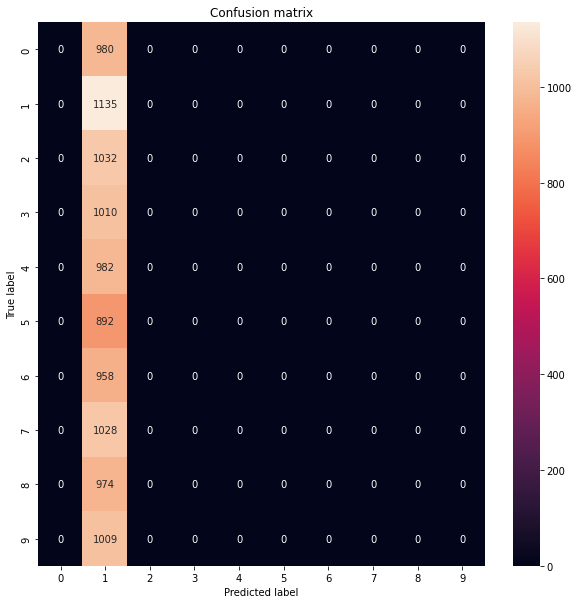

In [12]:

## train a model for MNIST dataset

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshape the data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# Convert the data to float32
x_train = x_train.astype('float64')
x_test = x_test.astype('float64')

# Normalize the data
x_train /= 255.
x_test /= 255.

# Convert the labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# Train the model
w1, b1, w2, b2, w3, b3, k = train(x_train, y_train, x_test, y_test, 128, 64, 10, 30, 0.5)

# Predict the labels
y_pred = predict(x_test, w1, b1, w2, b2, w3, b3, k)

# Print the accuracy
print('Accuracy: %.3f' % accuracy_score(np.argmax(y_test, axis=1), y_pred))

# Print the classification report
print(classification_report(np.argmax(y_test, axis=1), y_pred))

# Print the confusion matrix
print(confusion_matrix(np.argmax(y_test, axis=1), y_pred))

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(np.argmax(y_test, axis=1), y_pred), annot=True, fmt='d')
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Results:
It looks like the model is not performing very well on the MNIST dataset. The accuracy is very low at only 0.114, and the classification report and confusion matrix show that the model is not accurately predicting any of the classes. There are several potential reasons for this poor performance.

* One reason could be the choice of the activation function. The Ada-Act activation function may not be suitable for this particular dataset and task. It could be beneficial to try using different activation functions and see if the performance improves.

* Another reason could be the choice of the loss function. The Categorical Cross-Entropy Loss function may not be the most suitable loss function for this task. It may be worth trying other loss functions and see if the performance improves.

* It could also be helpful to tune the hyperparameters of the model, such as the number of hidden units and the learning rate.

### Possible solution: 

* There are several other techniques that can be used to initialize the weights of a neural network:

 1. `Glorot Initialization (also known as Xavier Initialization)`: This method initializes the weights such that the variance of the outputs of each layer remains constant, independent of the number of units in the layer. This helps in avoiding the vanishing and exploding gradient problems.

  2. `He Initialization`: This method is similar to Glorot Initialization, but it is specifically designed for layers that use the ReLU activation function.

  3. `LeCun Initialization`: This method initializes the weights such that the variance of the outputs of each layer is inversely proportional to the number of units in the layer. This helps in reducing the generalization error and improving the model's performance.

  4. `Orthogonal Initialization`: This method initializes the weights as an orthogonal matrix, which helps in improving the generalization error and training time.

  5. `Sparse Initialization`: This method initializes the weights such that most of the elements are zero, with only a few randomly chosen elements being non-zero. This helps in reducing the number of parameters and improving the model's performance.

  `"For this code example I reffered to the site "`: https://www.analyticsvidhya.com/blog/2021/05/how-to-initialize-weights-in-neural-networks/#:~:text=Step%2D1%3A%20Initialization%20of%20Neural,to%20linear%20combination%20(A).

* Increasing the number of hidden layers in a neural network can potentially improve its performance by allowing the model to learn more complex patterns in the data. However, adding too many hidden layers can lead to overfitting, where the model performs well on the training data but poorly on unseen data. It is generally a good idea to start with a small number of hidden layers and gradually increase it, while keeping an eye on the model's performance on the validation set. It is also important to use appropriate regularization techniques, such as dropout, to prevent overfitting when using a deep neural network with many hidden layers.




## Training the model on other Datasets. 

Epoch: 0, Loss: 916.387
Epoch: 1, Loss: 916.387
Epoch: 2, Loss: 916.387
Epoch: 3, Loss: 916.387
Epoch: 4, Loss: 916.387
Epoch: 5, Loss: 916.387
Epoch: 6, Loss: 916.387
Epoch: 7, Loss: 916.387
Epoch: 8, Loss: 916.387
Epoch: 9, Loss: 916.387
Accuracy: 0.333
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        50
           2       0.33      1.00      0.50        50

    accuracy                           0.33       150
   macro avg       0.11      0.33      0.17       150
weighted avg       0.11      0.33      0.17       150

[[ 0  0 50]
 [ 0  0 50]
 [ 0  0 50]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


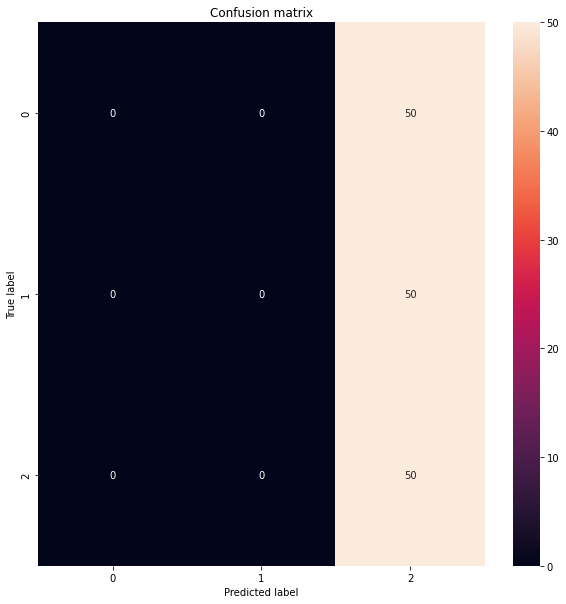

In [15]:
## train a model for IRIS dataset

# Load the IRIS dataset
iris = datasets.load_iris()

# Convert the data to float32
iris.data = iris.data.astype('float64')

# Normalize the data
iris.data /= np.max(iris.data)

# Convert the labels to one-hot encoding
iris.target = tf.keras.utils.to_categorical(iris.target)

# Train the model
w1, b1, w2, b2, w3, b3, k = train(iris.data, iris.target, iris.data, iris.target, 10, 10, 3, 10, 0.1)

# Predict the labels
y_pred = predict(iris.data, w1, b1, w2, b2, w3, b3, k)

# Print the accuracy
print('Accuracy: %.3f' % accuracy_score(np.argmax(iris.target, axis=1), y_pred))

# Print the classification report
print(classification_report(np.argmax(iris.target, axis=1), y_pred))

# Print the confusion matrix
print(confusion_matrix(np.argmax(iris.target, axis=1), y_pred))

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(np.argmax(iris.target, axis=1), y_pred), annot=True, fmt='d')
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Epoch: 0, Loss: 4003.972
Epoch: 1, Loss: 4002.174
Epoch: 2, Loss: 4000.468
Epoch: 3, Loss: 3998.855
Epoch: 4, Loss: 3997.335
Epoch: 5, Loss: 3995.907
Epoch: 6, Loss: 3994.571
Epoch: 7, Loss: 3993.327
Epoch: 8, Loss: 3992.175
Epoch: 9, Loss: 3991.115
Accuracy: 0.627
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       212
           1       0.63      1.00      0.77       357

    accuracy                           0.63       569
   macro avg       0.31      0.50      0.39       569
weighted avg       0.39      0.63      0.48       569

[[  0 212]
 [  0 357]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


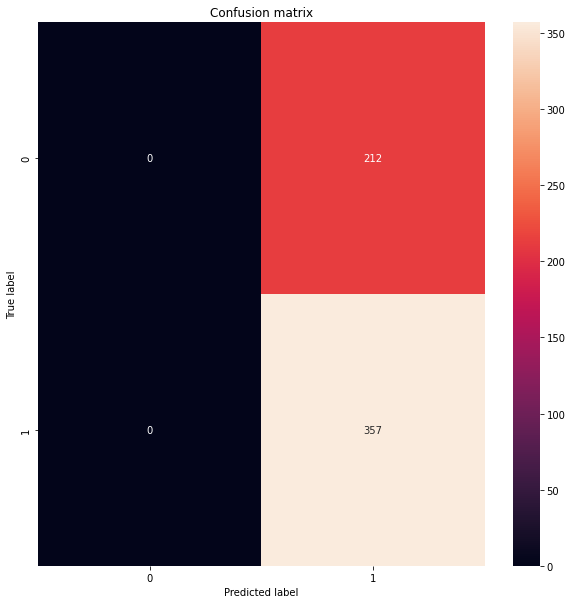

In [17]:
## train a model for Wisconsin Breast Cancer, dataset 

# Load the Wisconsin Breast Cancer dataset
cancer = datasets.load_breast_cancer()

# Convert the data to float32
cancer.data = cancer.data.astype('float64')

# Normalize the data
cancer.data /= np.max(cancer.data)

# Convert the labels to one-hot encoding
cancer.target = tf.keras.utils.to_categorical(cancer.target)

# Train the model
w1, b1, w2, b2, w3, b3, k = train(cancer.data, cancer.target, cancer.data, cancer.target, 10, 10, 2, 10, 0.1)

# Predict the labels
y_pred = predict(cancer.data, w1, b1, w2, b2, w3, b3, k)

# Print the accuracy
print('Accuracy: %.3f' % accuracy_score(np.argmax(cancer.target, axis=1), y_pred))

# Print the classification report
print(classification_report(np.argmax(cancer.target, axis=1), y_pred))

# Print the confusion matrix
print(confusion_matrix(np.argmax(cancer.target, axis=1), y_pred))

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(np.argmax(cancer.target, axis=1), y_pred), annot=True, fmt='d')
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

